<a href="https://colab.research.google.com/github/Abin-j-g7/Skillcraft_ML_01/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from zipfile import ZipFile

# Path to your uploaded file
zip_path = "/content/house-prices-advanced-regression-techniques (1).zip"

# Extract ZIP
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/house_data")


In [4]:
df = pd.read_csv("/content/house_data/train.csv")
print(df.shape)
df.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Drop columns with too many missing values
missing = df.isnull().sum()
drop_cols = missing[missing > 400].index
df = df.drop(columns=drop_cols)

# Fill numerical missing values with median
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-579921142.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-579921142.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [6]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding
print(df.shape)


(1460, 231)


In [7]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} -> RMSE: {rmse:.2f}, R²: {r2:.3f}")


Linear Regression -> RMSE: 51992.05, R²: 0.648
Ridge Regression -> RMSE: 48947.36, R²: 0.688
Lasso Regression -> RMSE: 51954.00, R²: 0.648


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.312e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [11]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
cv_scores = cross_val_score(lr, X, y, cv=5, scoring="r2")
print("Cross-validation R² scores:", cv_scores)
print("Average R²:", cv_scores.mean())


Cross-validation R² scores: [0.13005537 0.82426996 0.81476127 0.88618219 0.66725066]
Average R²: 0.6645038891050804


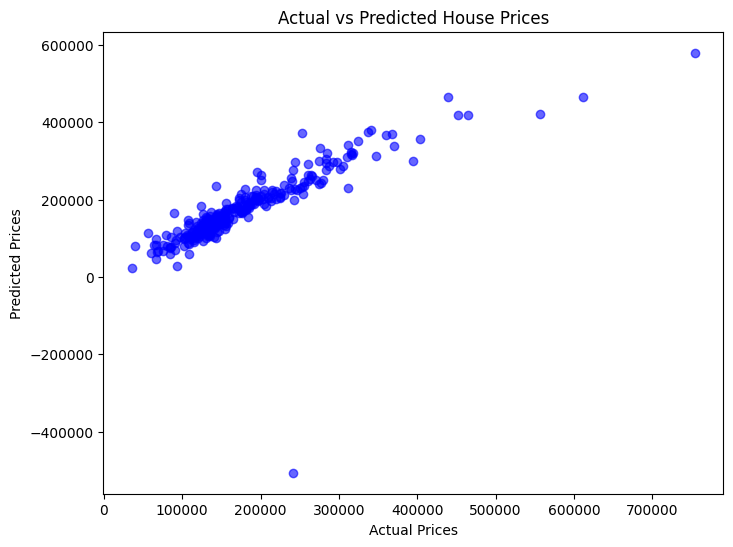

In [12]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


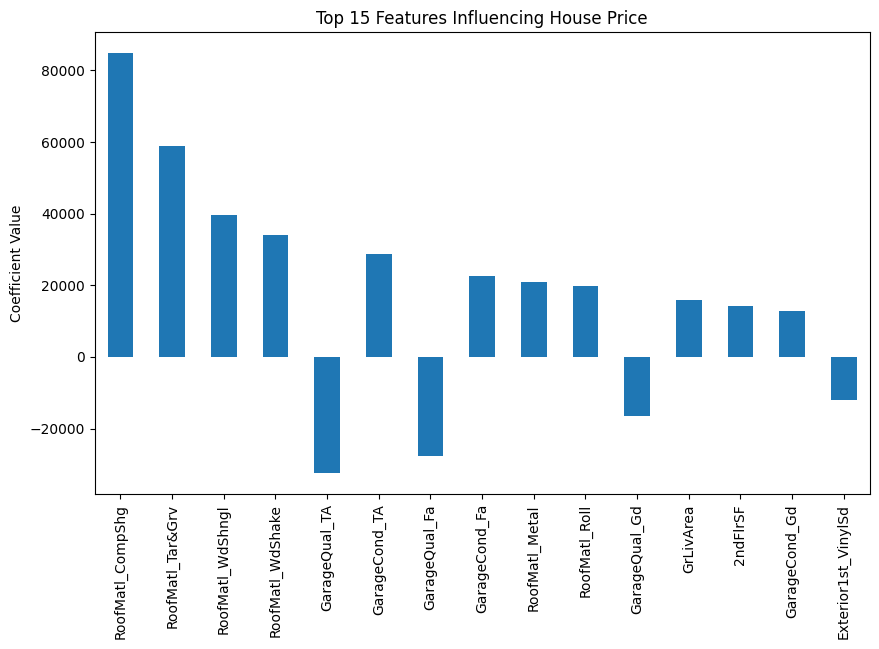

In [13]:
# Feature importance = model coefficients
coef = pd.Series(best_model.coef_, index=df.drop("SalePrice", axis=1).columns)
top_features = coef.sort_values(key=abs, ascending=False).head(15)

plt.figure(figsize=(10,6))
top_features.plot(kind="bar")
plt.title("Top 15 Features Influencing House Price")
plt.ylabel("Coefficient Value")
plt.show()
